```
CRIM--城镇人均犯罪率                                         ------【城镇人均犯罪率】
ZN - 占地面积超过25,000平方英尺的住宅用地比例。                ------【住宅用地所占比例】
INDUS - 每个城镇非零售业务的比例。                            ------【城镇中非商业用地占比例】
CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0        ------【查尔斯河虚拟变量，用于回归分析】
NOX - 一氧化氮浓度（每千万份）                                ------【环保指标】
RM - 每间住宅的平均房间数                                     ------【每栋住宅房间数】
AGE - 1940年以前建造的自住单位比例                            ------【1940年以前建造的自住单位比例 】
DIS -波士顿的五个就业中心加权距离                              ------【与波士顿的五个就业中心加权距离】
RAD - 径向高速公路的可达性指数                                ------【距离高速公路的便利指数】
TAX - 每10,000美元的全额物业税率                              ------【每一万美元的不动产税率】
PTRATIO - 城镇的学生与教师比例                                ------【城镇中教师学生比例】
B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例                ------【城镇中黑人比例】
LSTAT - 人口状况下降％                                       ------【房东属于低等收入阶层比例】
MEDV - 自有住房的中位数报价, 单位1000美元(刀乐！)              ------【自住房屋房价中位数】
```

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
#从链接下载数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
data = pd.read_csv(url, header=None,  sep=r'\s+')

# 设置列名
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#将数据集保存为 CSV 文件
data.to_csv(r"C:\Users\admin\Analyse Boston House Price\housingpricedataset.csv", index=False)

print("数据已成功转换为 CSV 格式并保存为 housingpricedataset.csv 文件")

# 重新加载 CSV 文件
df = pd.read_csv(r"C:\Users\admin\Desktop\一定要进QG工作室啊\QG考核\波士顿房价数据分析\housingpricedataset.csv")
df

数据已成功转换为 CSV 格式并保存为 housingpricedataset.csv 文件


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [43]:
#检查数据集
#数据集的行数和列数
df.shape

(506, 14)

In [44]:
#检查数据集是否存在缺失
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

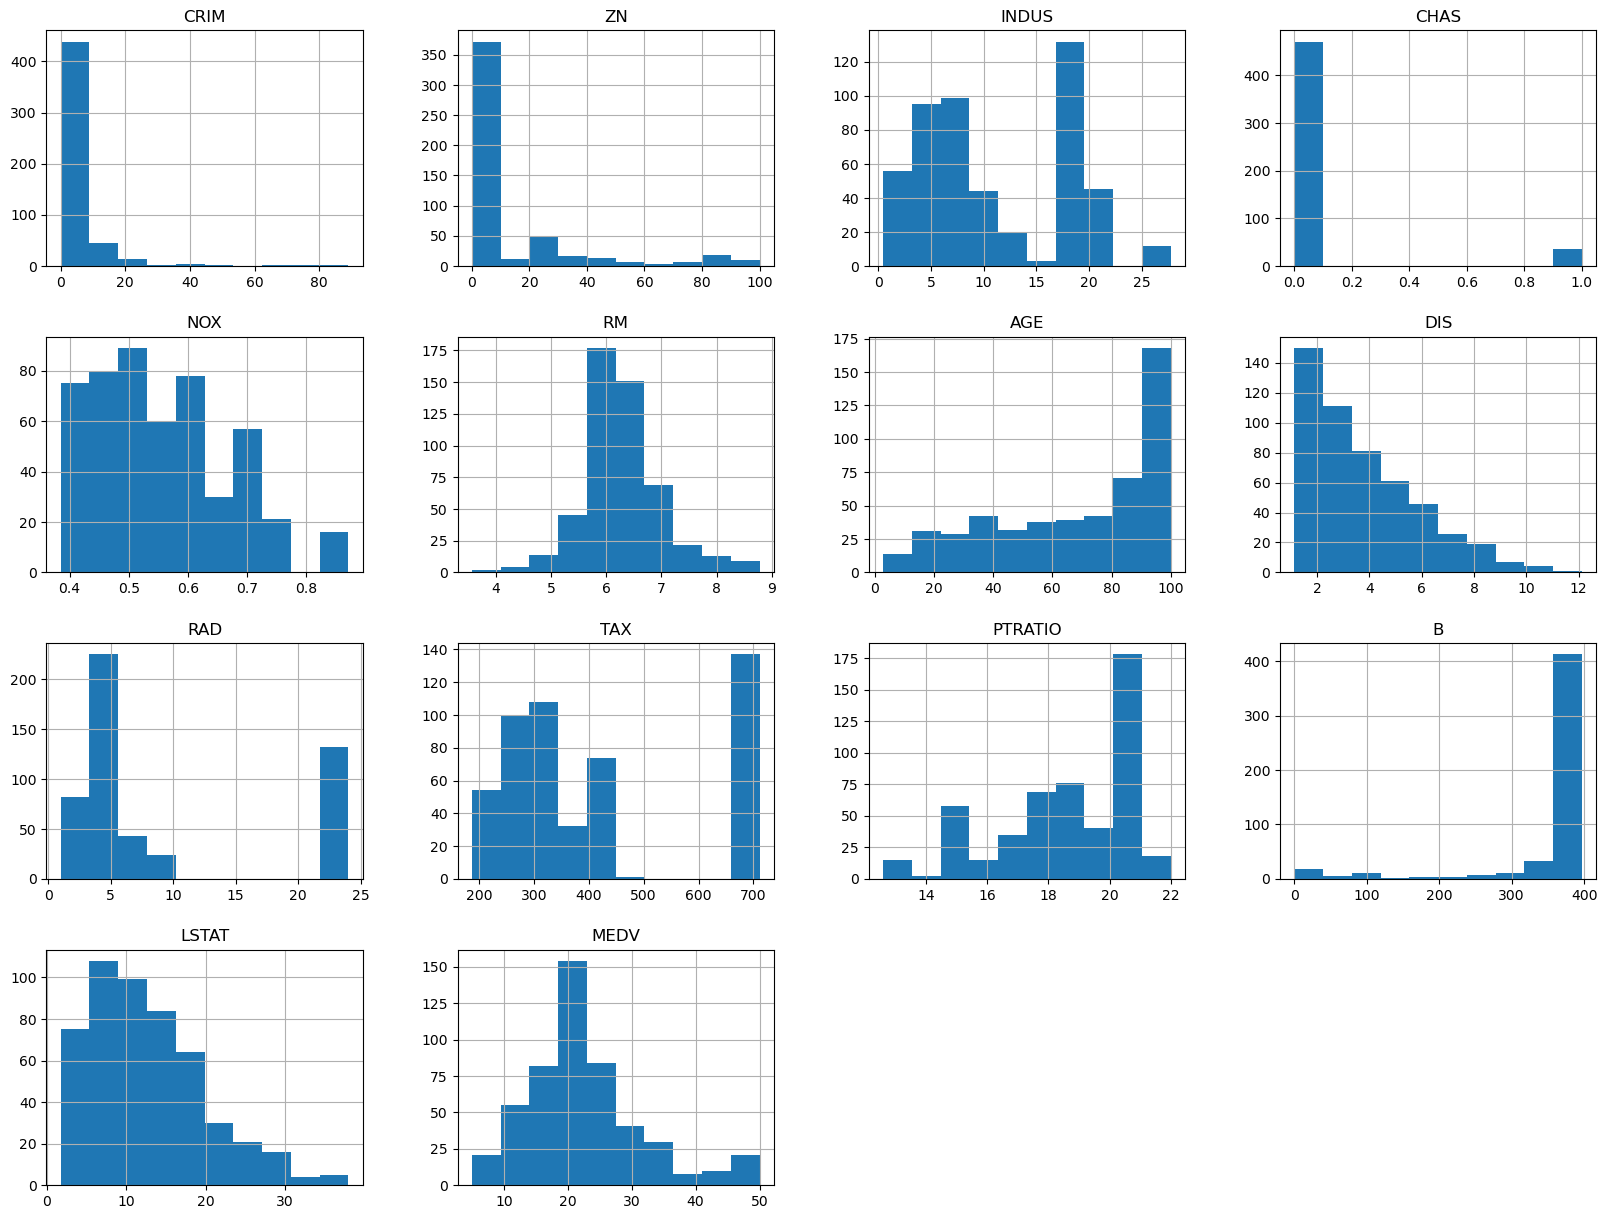

In [45]:
#相关数据的特征直方图
df.hist(figsize=(20,15))

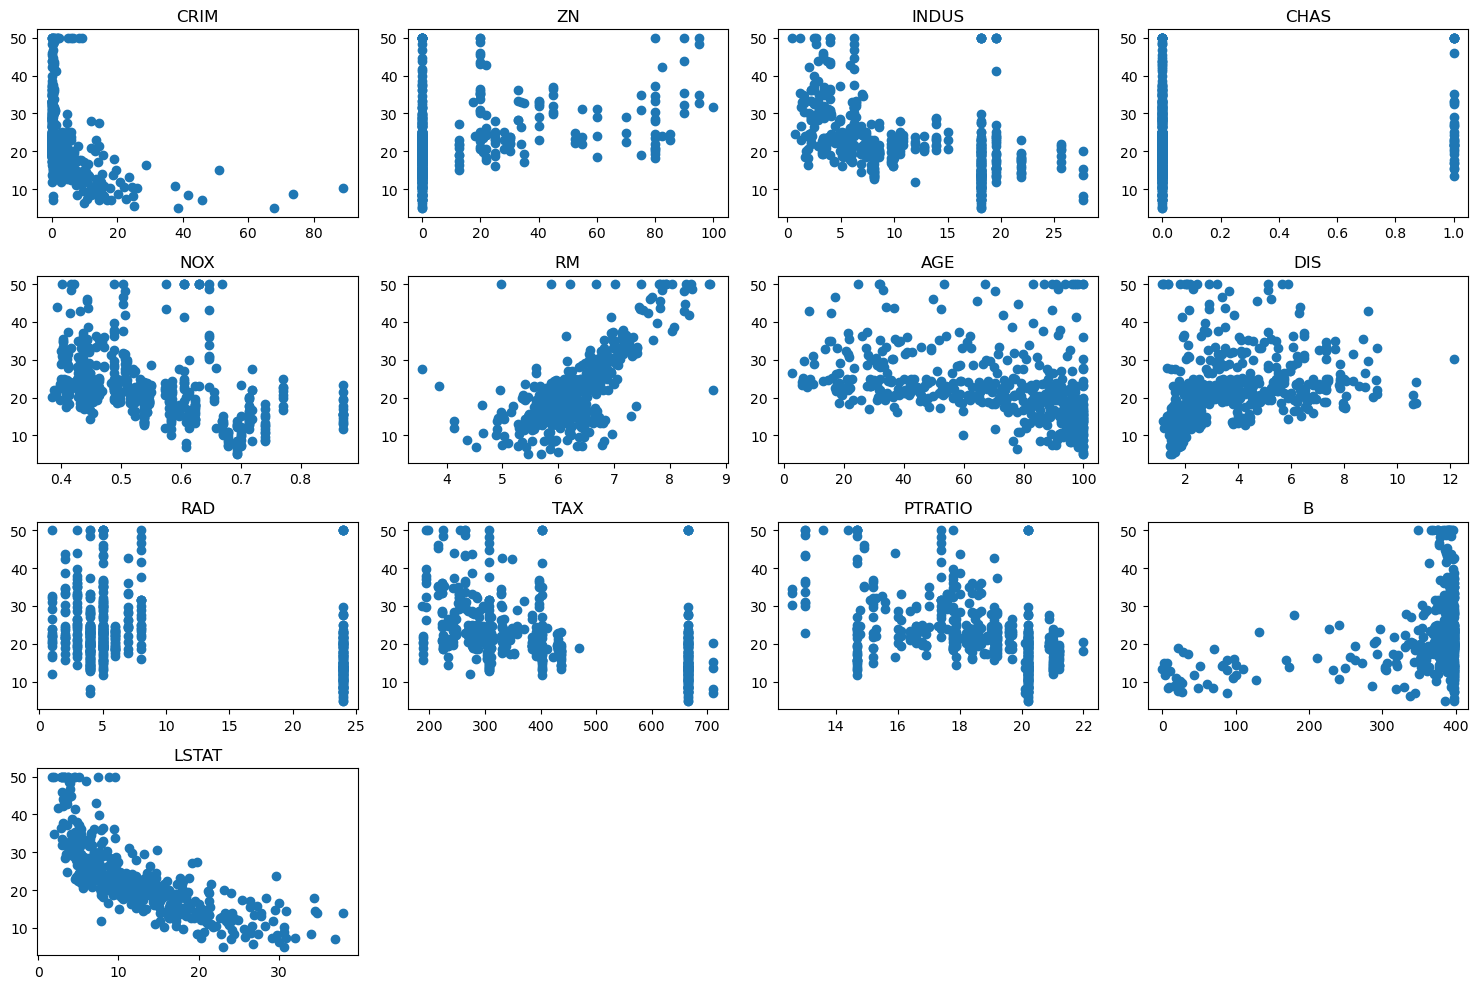

In [46]:
#可视化 ：观察特征和莫表之间的相关性（每个特征与 MEDV 房价之间的相关性）
#散点图
import math

cols = 4    # 每行四张图
rows = math.ceil(13 / cols)    # 可分4行

plt.figure(figsize=(15,10))
for idx in range(13):    # 循环输出每张图
    plt.subplot(rows, cols, idx + 1)    # 总共几行几列画到了第几张
    plt.scatter(df[ data.columns[idx]], df['MEDV'])    # 某个特征与房价的关系
    plt.title(data.columns[idx])    # 每张图上打标题明确特征
plt.tight_layout()    # 自适应，让图片更好看

In [47]:
#计算相关性系数
df.corr()    #正相关 or 负相关,并做出矩阵图
df.corr().abs()    #相关性强弱,只关注与 MEDV 的相关性就好

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
CHAS,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


Text(0.5, 1.0, 'Correlation Heatmap')

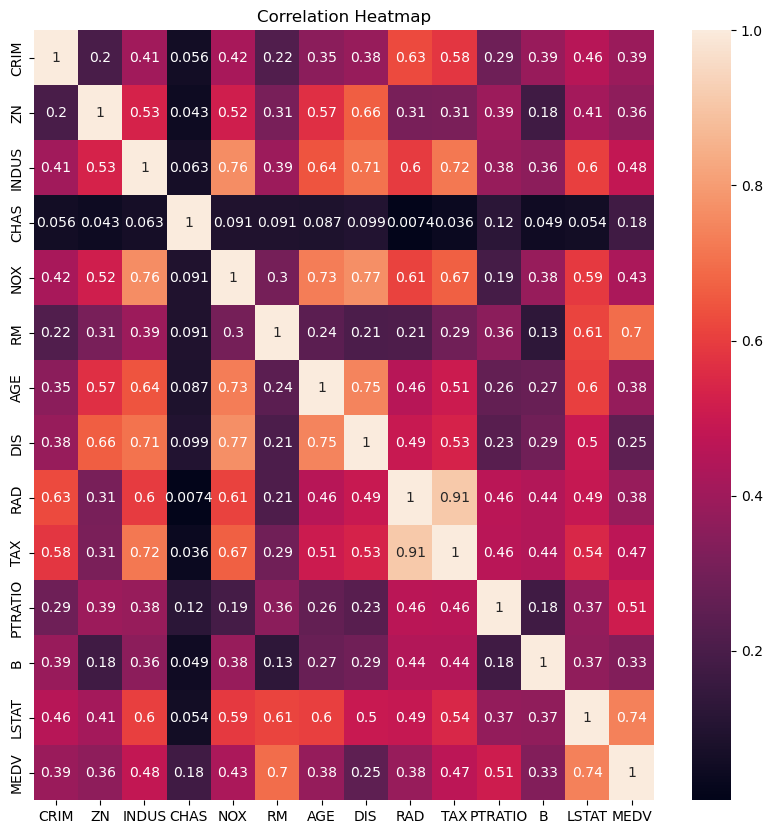

In [48]:
#相关性系数的热力图
import seaborn as sns    #画热力图要用到的函数

plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot = True)    #传入相关性矩阵为热力图
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Definite Main Feaure Correlation Chart')

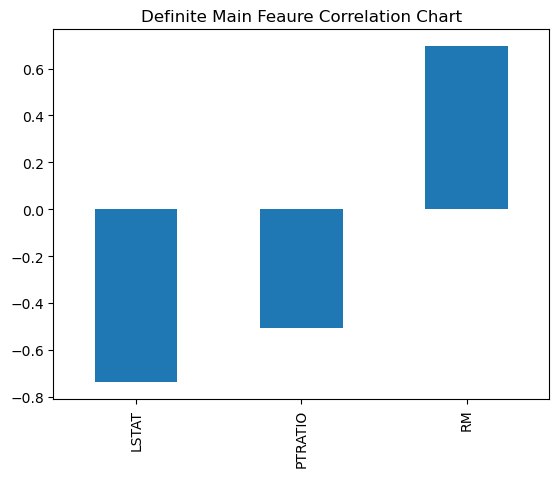

In [49]:
#确定主要特征
corr = data.corr()
corr = corr['MEDV']
#筛选出相关性系数在如下范围内的特征
corr = corr[abs(corr) > 0.5]
corr = corr[abs(corr) < 1]
#计算、排序并绘制条形图
corr.sort_values().plot.bar()
plt.title('Definite Main Feaure Correlation Chart')

In [50]:
#归一化函数
def min_max_scale(array):
    min_val, max_val = array.min(), array.max()
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array    #返回归一化后的数组

# 对所有特征进行归一化
features_scaled = []
for col in data.columns[:-1]:  # 除了最后一列 'MEDV'
    features_scaled.append(min_max_scale(data[col]))
X = pd.DataFrame(features_scaled).T

# 目标变量，调整形状为二维数组，存到 Y 中
Y = data['MEDV'].values.reshape(-1, 1)

print(f"Scaled Features Shape: {X.shape}, Target Shape: {Y.shape}")

Scaled Features Shape: (506, 13), Target Shape: (506, 1)


In [51]:
import numpy as np

# 添加偏置列到特征矩阵
ones_column = np.ones((X.shape[0], 1))
X_with_bias = np.hstack([ones_column, X])

# 最小二乘法求最小误差
# 使用正规方程求解 θ
XT_X_inv = np.linalg.inv(np.dot(X_with_bias.T, X_with_bias))  
theta_best = XT_X_inv @ X_with_bias.T @ Y  

print("Optimal Parameters:", theta_best.flatten())

Optimal Parameters: [ 26.62026758  -9.60975755   4.64204584   0.56083933   2.68673382
  -8.63457306  19.88368651   0.06721501 -16.22666104   7.03913802
  -6.46332721  -8.95582398   3.69282735 -19.01724361]


Mean Squared Error on Training Data: 21.894831181729206


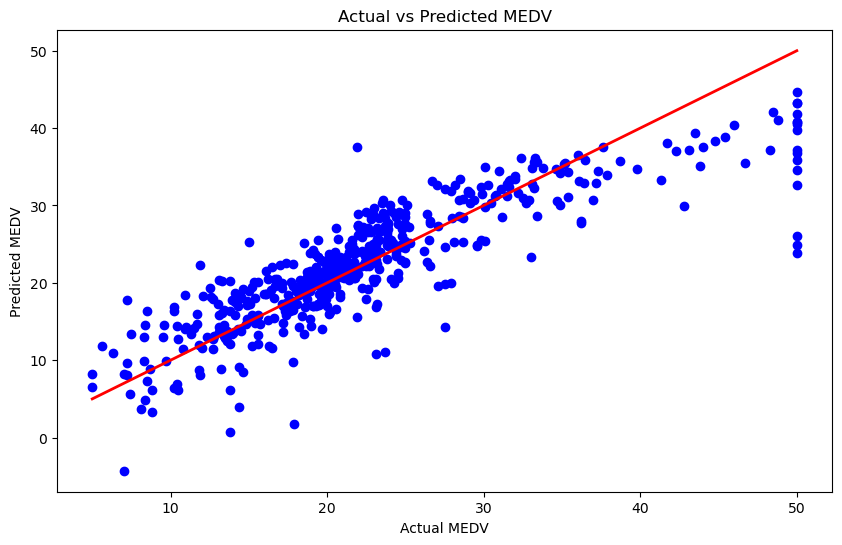

In [52]:
# 使用模型进行预测
def predict(X, theta):
    return X @ theta

# 在训练数据上进行预测
X_with_bias_np = np.hstack([np.ones((X.shape[0], 1)), X.values])  # 确保 X是 NumPy数组
predictions = predict(X_with_bias_np, theta_best)

# 计算预测结果的均方误差
mse = np.mean((predictions - Y) ** 2)
print(f"Mean Squared Error on Training Data: {mse}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(Y, predictions, color='blue')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linewidth=2)    # 拟合函数
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")    # 观测值与预测值对比
plt.show()

Text(0.5, 1.0, 'Convergence of Gradient Descent')

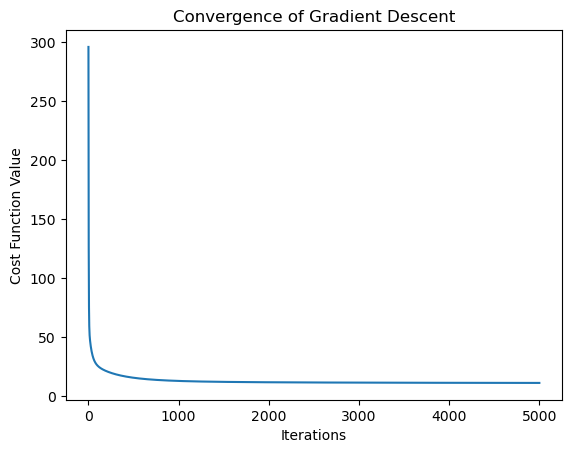

In [53]:
class LinearRegression:
    # 初始化线性回归模型，设置学习率和迭代次数
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate    # 设置学习率
        self.num_iterations = num_iterations    # 设置迭代次数
    
    # 拟合模型，使用梯度下降法优化参数
    def fit(self, X, Y):
        n_samples, n_features = X.shape  # 获取样本数量和特征数量
        
        # 初始化参数为零向量，形状为 (特征数量+1, 1)，+1 是因为添加了偏置项
        self.theta = np.zeros((n_features + 1, 1))

        # 构建扩展后的设计矩阵 [1 | x1 | ...|xn ]
        ones_col = np.ones((n_samples, 1))  # 创建偏置项列，迭代前全为 1
        X_b = np.c_[ones_col, X]  # 将偏置项列添加到特征矩阵中

        costs = []  # 初始化成本历史列表，用于记录每次迭代的成本

        # 梯度下降迭代过程
        for iteration in range(self.num_iterations):
            predictions = X_b @ self.theta  # 计算预测值
            
            error = predictions - Y  # 计算预测值和实际值之间的误差
            cost = np.sum(error ** 2)/(2*n_samples)  # 计算成本函数（均方误差）
            
            gradient = X_b.T @ error / n_samples  # 计算梯度
            self.theta -= self.learning_rate * gradient  # 更新参数
            
            costs.append(cost)  # 记录每次迭代的成本
        
        return costs  # 返回成本历史列表
    
# 创建模型实例
model = LinearRegression(learning_rate=0.05, num_iterations=5000)
cost_history = model.fit(X, Y)  # 训练模型并获取成本历史

# 绘制成本函数随迭代次数的变化图
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')  # 设置 x 轴标签 —— 迭代次数
plt.ylabel('Cost Function Value')  # 设置 y 轴标签 —— MEDV 房屋价值
plt.title('Convergence of Gradient Descent')  # 设置图表标题